In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:
df_DS_interest=pd.read_csv('https://cocl.us/datascience_survey_data',index_col=0)
df_DS_interest.head(6)

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [3]:
df_DS_interest=df_DS_interest.sort_values(by=['Very interested'],ascending=False)
df_DS_interest.head(6)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [4]:
df_DS_interest_pct=df_DS_interest.copy(deep=True)
for i in range(6):
    for m in range(3):
        df_DS_interest_pct.iloc[i,m]=round(df_DS_interest.iloc[i,m]/2233,2)

df_DS_interest_pct.head(6)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.76,0.20,0.03
Machine Learning,0.73,0.21,0.03
Data Visualization,0.60,0.33,0.05
Big Data (Spark / Hadoop),0.60,0.33,0.06
Deep Learning,0.57,0.34,0.06
Data Journalism,0.19,0.48,0.27


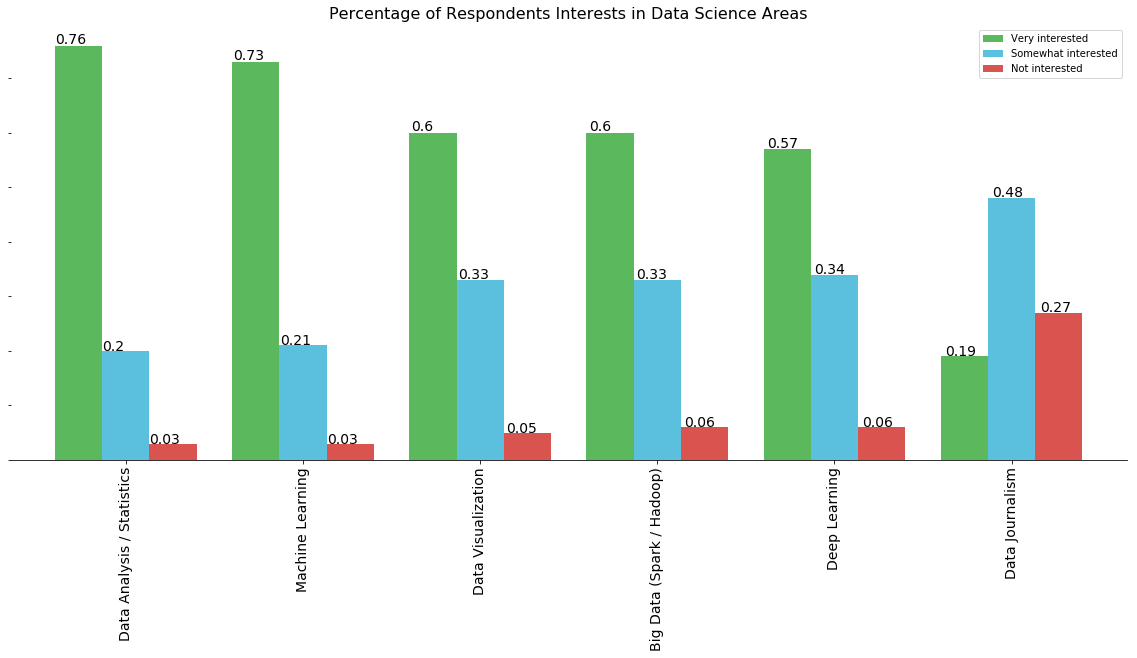

In [5]:
ax=df_DS_interest_pct.plot(kind='bar',width=0.8,color=['#5cb85c','#5bc0de','#d9534f'],figsize=(20,8),fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticklabels('')
plt.title('Percentage of Respondents Interests in Data Science Areas',fontsize=16)
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005),fontsize=14)

plt.show()

In [3]:
df_SF_crime=pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df_SF_crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [4]:
df_SF_crime_district=df_SF_crime.groupby('PdDistrict').agg({'IncidntNum':'count'})
df_SF_crime_district=df_SF_crime_district.sort_values(by=['IncidntNum'],ascending=False)
df_SF_crime_district.reset_index(drop=False,inplace=True)
print(df_SF_crime_district.columns)
df_SF_crime_district.head(11)

Index(['PdDistrict', 'IncidntNum'], dtype='object')


,PdDistrict,IncidntNum
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [35]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='275bb7b9-6190-4204-bf1d-37006ad27024', project_access_token='p-94441e2e8b35edf08c9ce4ea9a97fb500137ad1b')
pc = project.project_context
filenames = project.get_files()
print(filenames)

[{'name': 'san-francisco.geojson', 'asset_id': 'a03d8c04-3073-44b0-8633-ad4a0e8689b2'}, {'name': 'san-francisco_geo.json', 'asset_id': '92ed7ba3-d0bb-4bcc-bb78-84e570fc6228'}]


In [36]:
# Fetch the file
sanFran_dist = project.get_file("san-francisco_geo.json")
sanFran_dist_str=sanFran_dist.getvalue()

In [37]:
# Map of San Francisco
SanFran_map = folium.Map(location=[37.7,-122.42], zoom_start=12)
SanFran_map.choropleth(
    geo_data=sanFran_dist,
    data=df_SF_crime_district,
    columns=['PdDistrict', 'IncidntNum'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Quantities of crimes per district',
)

SanFran_map

ValueError: Unhandled object <_io.BytesIO object at 0x7f413e9c8518>.